<a href="https://colab.research.google.com/github/rahulrajpr/TensorFlowDeveloperCertifcateTraining/blob/ConvolutionalNueralNetwork/CNN_ComputerVision_BinaryClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
import numpy as np

Lets open the load the image folder to the colab memory

In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

ziplink = zipfile.ZipFile('pizza_steak.zip')

ziplink.extractall()

ziplink.close()

--2023-02-11 07:19:26--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 74.125.24.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  23.3MB/s    in 5.5s    

2023-02-11 07:19:33 (18.9 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



Lets look at the file stuctutre of the image folders

In [3]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

lets look at the structure of the directoy using the os library

In [4]:
import os

for dirpath,dirname,filename in os.walk('pizza_steak'):
  n_dirs = len(dirname)
  n_files = len(filename)
  print('there are {0} directories and {1} files in {2}'.format(n_dirs,n_files,dirpath))

there are 2 directories and 0 files in pizza_steak
there are 2 directories and 0 files in pizza_steak/train
there are 0 directories and 750 files in pizza_steak/train/pizza
there are 0 directories and 750 files in pizza_steak/train/steak
there are 2 directories and 0 files in pizza_steak/test
there are 0 directories and 250 files in pizza_steak/test/pizza
there are 0 directories and 250 files in pizza_steak/test/steak


Another way to inspect the directory

In [5]:
# printing the number of the images for trainig for the steak

len(os.listdir('pizza_steak/train/steak'))

750

In [6]:
# printing the number of the images for trainig for the pizza

len(os.listdir('pizza_steak/train/pizza'))

750

Inference : the trainig dataset is so balanced in this case

Lets look at the random images

In [7]:
# lets import the required libraries

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [8]:
def view_random_image(sample_type,class_name):

  directory = 'pizza_steak/'+sample_type+'/'+class_name

  img_list = os.listdir(directory)

  sample_img_list = random.sample(img_list,1)
  sample_img_name = sample_img_list[0]

  sample_img_path = directory+'/'+sample_img_name

  img_value = mpimg.imread(sample_img_path)

  print('image shape : ',img_value.shape)
  plt.title(class_name+'/'+sample_type)
  plt.imshow(img_value)

  return img_value

image shape :  (384, 512, 3)


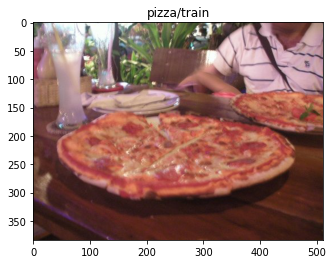

In [9]:
random_train_pizza = view_random_image('train','pizza')

image shape :  (512, 512, 3)


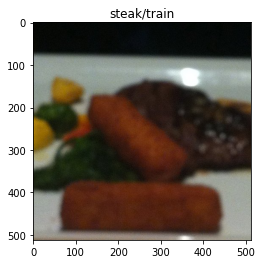

In [10]:
random_train_steak = view_random_image('train','steak')

Building the CNN using the Tiny VGG architecture in CNN Explainer website

- 1.Visualizethe data
- 2.Preprocess the data 
- 3.Build the CNN
- 4.Evalaute
- 5.Modify and beat the baseline model(experiment, experiment, experiment)

preprocess the data

In [11]:
# define the directory

train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

Turning into batches, 

batches are the subset of the data, which keeps the model does not go out of memory as we train theim the image data or (high volume data ) in  entirety.o

Note : 32 is a conventional batch size in the deep learning world

In [12]:
# image data generator - preprocessing

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
# create the image generator object

train_image_gen = ImageDataGenerator(rescale = 1/225) # image generator object with scaling factor , 225 is the maximum value that a pixel can have
test_image_gen = ImageDataGenerator(rescale = 1/225) # image generator object with scaling factor , 225 is the maximum value that a pixel can have

In [14]:
# create the train and the test dataset

# image data generator get the stores the data of the image and the class name based on the director in which it is saved to. and it retuns a memory object of a batches

train_data = train_image_gen.flow_from_directory(directory = train_dir,
                                                 target_size = (224,224),
                                                 class_mode = 'binary',
                                                 batch_size = 32)

test_data = test_image_gen.flow_from_directory(directory = test_dir,
                                                 target_size = (224,224),
                                                 class_mode = 'binary',
                                                 batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [15]:
train_data

In [16]:
train_data.num_classes

2

In [17]:
# retuns the number of batches

len(train_data)

47

In [18]:
train_data.image_shape

(224, 224, 3)

In [19]:
images, labels = train_data.next()

In [20]:
images[0], labels[0]

(array([[[0.5822222 , 0.3288889 , 0.03111111],
         [0.5822222 , 0.3288889 , 0.03111111],
         [0.5866667 , 0.33333334, 0.03555556],
         ...,
         [0.62222224, 0.6755556 , 0.6666667 ],
         [0.61333334, 0.6666667 , 0.6577778 ],
         [0.62222224, 0.6755556 , 0.6666667 ]],
 
        [[0.5555556 , 0.31111112, 0.02222222],
         [0.5733333 , 0.32      , 0.02222222],
         [0.5644445 , 0.32      , 0.02222222],
         ...,
         [0.63111115, 0.6844445 , 0.6755556 ],
         [0.61777776, 0.6711111 , 0.66222227],
         [0.61333334, 0.6666667 , 0.6577778 ]],
 
        [[0.54222226, 0.29333335, 0.02222222],
         [0.5688889 , 0.32444444, 0.03555556],
         [0.5733333 , 0.3288889 , 0.03111111],
         ...,
         [0.63111115, 0.6844445 , 0.6844445 ],
         [0.62666667, 0.68      , 0.6711111 ],
         [0.62222224, 0.6755556 , 0.6666667 ]],
 
        ...,
 
        [[0.4577778 , 0.48444447, 0.48444447],
         [0.4577778 , 0.48444447, 0.48444

Lets look at the convolutional nueral network parameters

reference : https://poloclub.github.io/cnn-explainer/

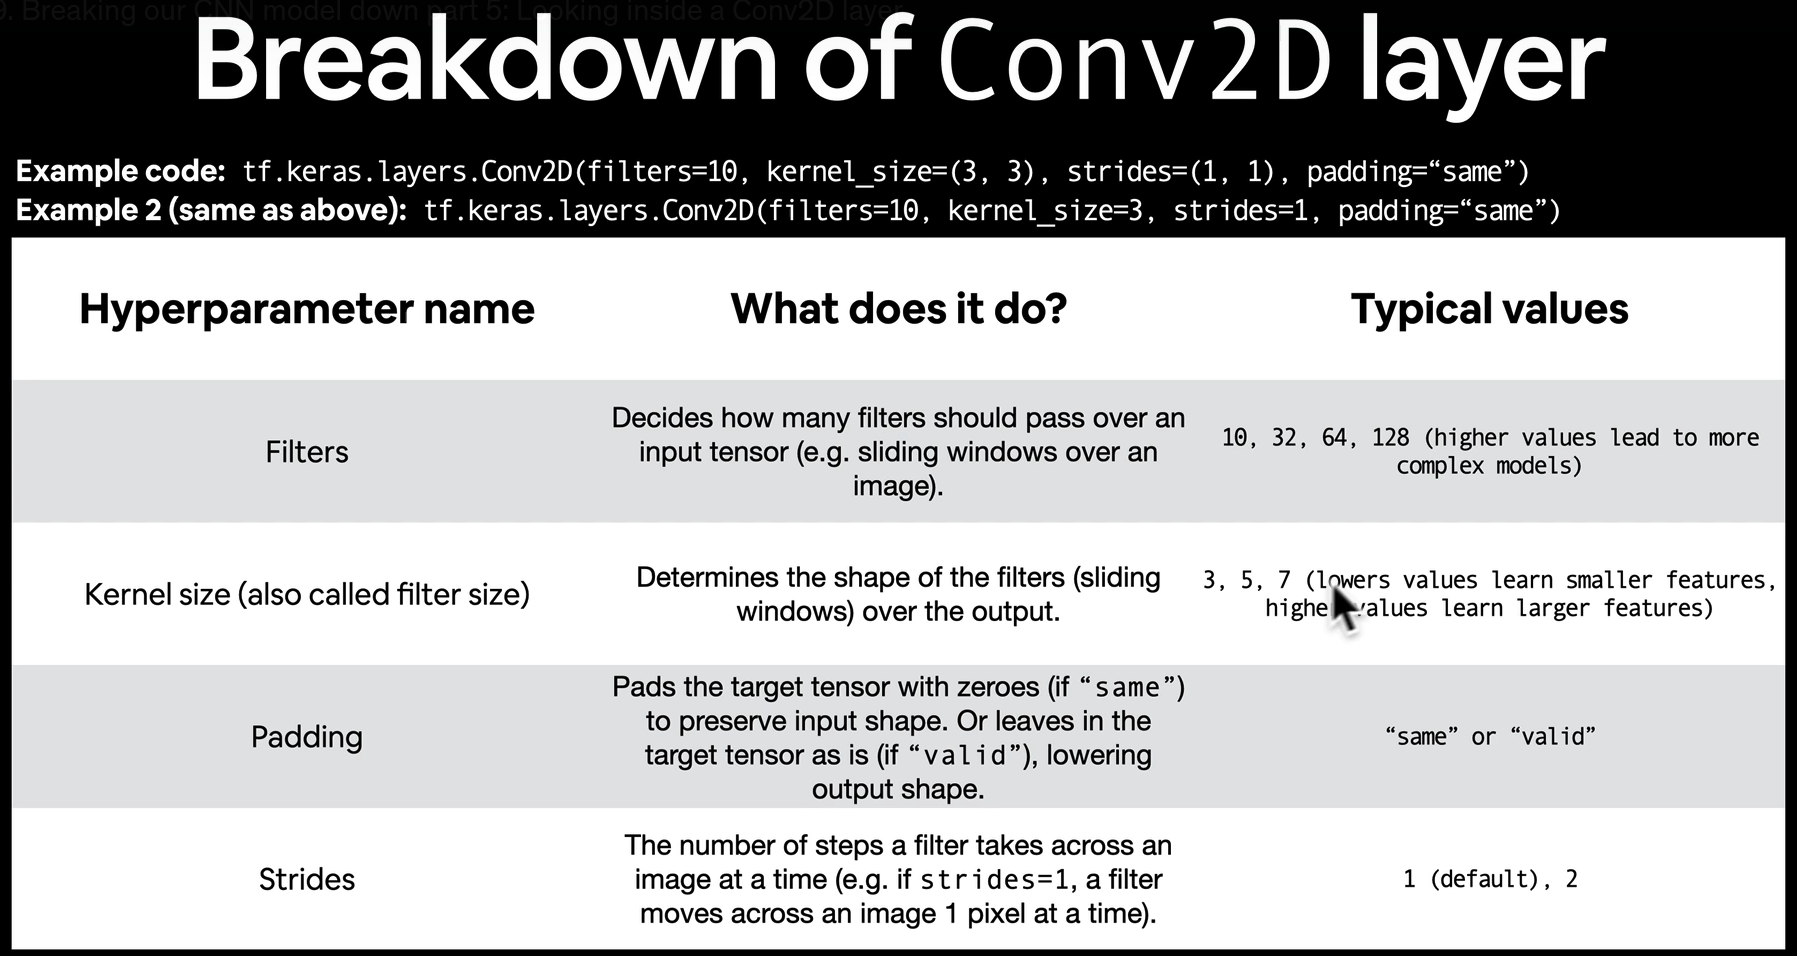

In [21]:
# import the required libraries and classes

import tensorflow as tf

from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential


In [22]:
# build the first model

tf.random.set_seed(42)

model_1 = Sequential([Conv2D(filters = 10,
                             kernel_size = (3,3),
                             strides = (1,1),
                             padding = 'valid',
                             activation = 'relu',
                             input_shape = (224,224,3)),
                      Conv2D(filters = 10,
                             kernel_size = (3,3),
                             activation = 'relu'),
                      Conv2D(filters = 10,
                             kernel_size = (3,3),
                             activation = 'relu'),
                      Flatten(),
                      Dense(units = 1, activation = 'sigmoid')], name = 'M1') # since it is a binary classification

In [23]:
# compile and fit the model

model_1.compile(loss = 'binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

history_1 = model_1.fit(train_data,
                        epochs = 5,
                        batch_size = 32,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 20s 217ms/step - loss: 0.8003 - accuracy: 0.6633 - val_loss: 0.5647 - val_accuracy: 0.7020
Epoch 2/5
47/47 [==============================] - 9s 202ms/step - loss: 0.4882 - accuracy: 0.7613 - val_loss: 0.4515 - val_accuracy: 0.7880
Epoch 3/5
47/47 [==============================] - 9s 197ms/step - loss: 0.3338 - accuracy: 0.8660 - val_loss: 0.3793 - val_accuracy: 0.8160
Epoch 4/5
47/47 [==============================] - 9s 199ms/step - loss: 0.1658 - accuracy: 0.9473 - val_loss: 0.3991 - val_accuracy: 0.8220
Epoch 5/5
47/47 [==============================] - 9s 192ms/step - loss: 0.0557 - accuracy: 0.9867 - val_loss: 0.4810 - val_accuracy: 0.8100


In [24]:
model_1.summary()

Model: "M1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten (Flatten)           (None, 475240)            0         
                                                                 
 dense (Dense)               (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


Evaluating the model

In [25]:
model_1.evaluate(test_data)

16/16 [==============================] - 3s 163ms/step - loss: 0.4810 - accuracy: 0.8100


[0.48096728324890137, 0.8100000023841858]

In [26]:
import pandas as pd

In [27]:
pd.DataFrame(history_1.history)

,loss,accuracy,val_loss,val_accuracy
0,0.800320,0.663333,0.564748,0.702
1,0.488249,0.761333,0.451543,0.788
2,0.333772,0.866000,0.379311,0.816
3,0.165796,0.947333,0.399086,0.822
4,0.055700,0.986667,0.480967,0.810


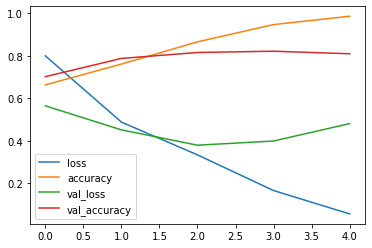

In [28]:
pd.DataFrame(history_1.history).plot()

create validation plot function

In [29]:
def eval_plot(history):

  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  plt.figure(figsize = (18,6))
  plt.subplot(1,2,1)
  plt.plot(loss, label = 'loss')
  plt.plot(val_loss,label = 'validation loss')
  plt.xlabel('epochs')
  plt.title('loss')
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(accuracy, label = 'accuracy')
  plt.plot(val_accuracy,label = 'validation accuracy')
  plt.xlabel('epochs')
  plt.title('accuracy')
  plt.legend()

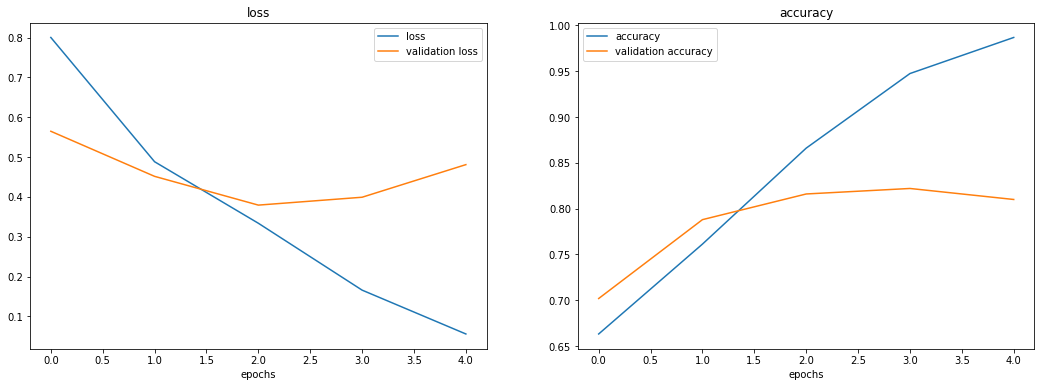

In [30]:
eval_plot(history_1)

Inference This Model is highly overfitting

Improving a deep leaning model via

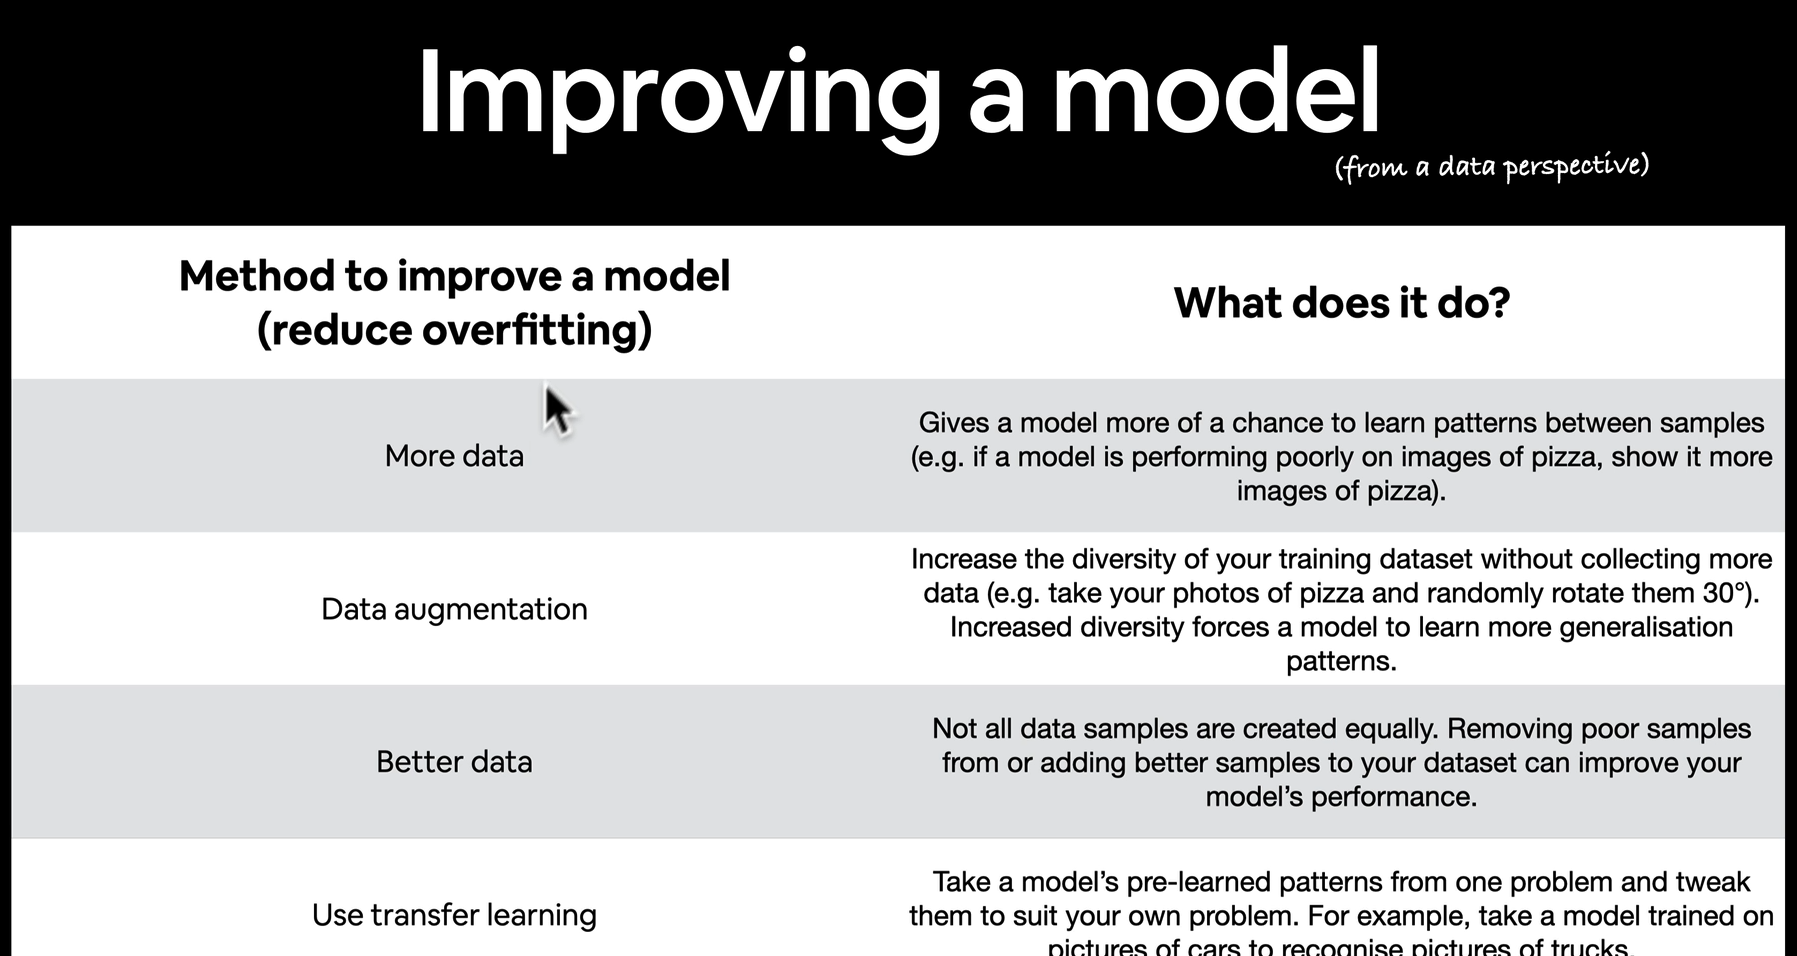

Reduce overfitting using 

- 1. introducing the MaxPool Layer
- 2. Augmenting the Data

> Intoducing the MaxPool Layer

In [31]:
# create model 2
# introducing the MaxPool2D Layer into the model - that requces the feature size and only carry on with relevant features

tf.random.set_seed(42)

model_2 = Sequential([
    Conv2D(filters = 10, kernel_size = (3,3), activation = 'relu', input_shape = (224,224,3)),
    MaxPool2D(pool_size = (2,2)),
    Conv2D(10,(3,3),activation = 'relu'),
    MaxPool2D(),
    Conv2D(10,(3,3), activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = 'sigmoid')], name = 'M2')

compile and fit the model

In [32]:
model_2.compile(loss = 'binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

history_2 = model_2.fit(train_data,
            epochs = 5,
            steps_per_epoch = len(train_data),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 197ms/step - loss: 0.5655 - accuracy: 0.7213 - val_loss: 0.4425 - val_accuracy: 0.8360
Epoch 2/5
47/47 [==============================] - 9s 189ms/step - loss: 0.4873 - accuracy: 0.7693 - val_loss: 0.4251 - val_accuracy: 0.8100
Epoch 3/5
47/47 [==============================] - 9s 182ms/step - loss: 0.4492 - accuracy: 0.8053 - val_loss: 0.3730 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 10s 204ms/step - loss: 0.4090 - accuracy: 0.8200 - val_loss: 0.3992 - val_accuracy: 0.8060
Epoch 5/5
47/47 [==============================] - 9s 193ms/step - loss: 0.4093 - accuracy: 0.8147 - val_loss: 0.3464 - val_accuracy: 0.8600


Inspect and evaluate the model

In [33]:
model_2.summary()

Model: "M2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 10)       0        

In [34]:
model_2.evaluate(test_data)

16/16 [==============================] - 2s 128ms/step - loss: 0.3464 - accuracy: 0.8600


[0.34640827775001526, 0.8600000143051147]

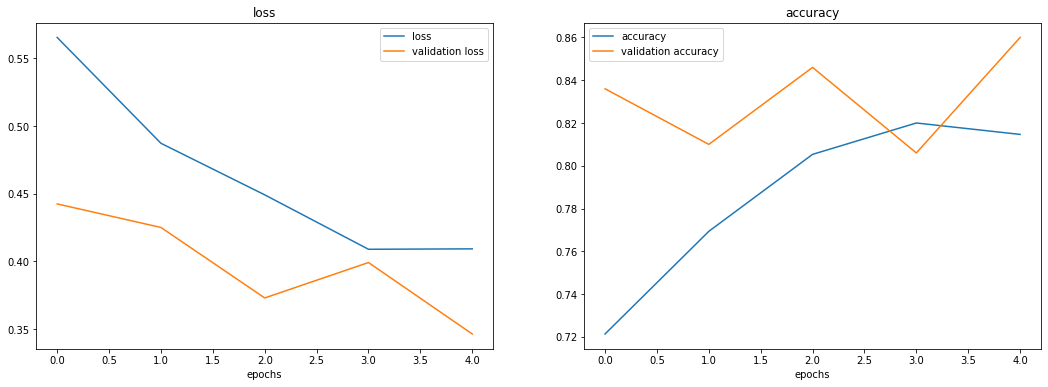

In [35]:
eval_plot(history_2)

> Augmenting the Data

- Augnmentation can be done while loading the data using ImageDataGenerator, by fixing different parameters, each of the augmentation parameters are applied randomly to the imgaes, that basically makes a lot of diversity to the original data, which hopefully help model to generalise towards the unseen data

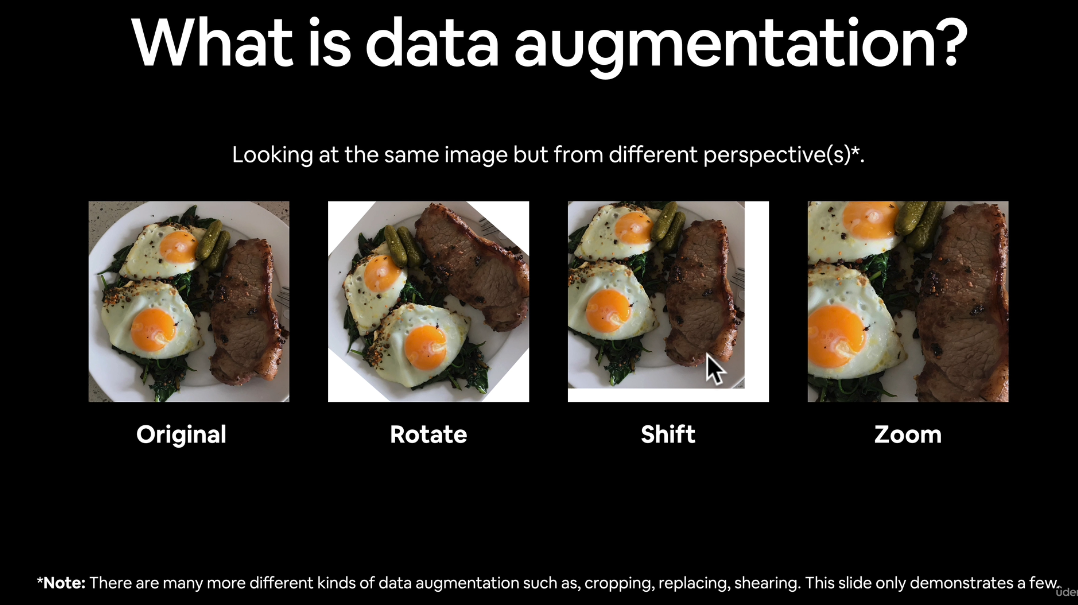

In [36]:
tf.random.set_seed(42)

train_gen_augmented = ImageDataGenerator(rotation_range= 0.2,
                                         width_shift_range= 0.2,
                                         height_shift_range=0.2,
                                         shear_range =0.2,
                                         zoom_range = 0.2,
                                         horizontal_flip = True,
                                         rescale = 1/255.0,
                                         )

In [37]:
train_data_augmented = train_gen_augmented.flow_from_directory(directory = train_dir,
                                                               target_size = (224,224),
                                                               class_mode = 'binary',
                                                               batch_size = 32,
                                                               )

Found 1500 images belonging to 2 classes.


Lets build the model 3 with augmented input

In [38]:
tf.random.set_seed(42)

model_3 = Sequential([
    Conv2D(filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'valid', activation = 'relu', input_shape = (224,224,3)),
    MaxPool2D(pool_size = (2,2)),
    Conv2D(10,3,activation = 'relu'),
    MaxPool2D(),
    Conv2D(10,3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(units = 1, activation = 'sigmoid')
], name = 'M3')

In [39]:
model_3.compile(loss = 'binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

history_3 = model_3.fit(train_data_augmented,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 463ms/step - loss: 0.6413 - accuracy: 0.6213 - val_loss: 0.4764 - val_accuracy: 0.7880
Epoch 2/5
47/47 [==============================] - 22s 475ms/step - loss: 0.5138 - accuracy: 0.7433 - val_loss: 0.3709 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 22s 473ms/step - loss: 0.4840 - accuracy: 0.7773 - val_loss: 0.3735 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 22s 472ms/step - loss: 0.4827 - accuracy: 0.7653 - val_loss: 0.3377 - val_accuracy: 0.8400
Epoch 5/5
47/47 [==============================] - 23s 483ms/step - loss: 0.4571 - accuracy: 0.7920 - val_loss: 0.3352 - val_accuracy: 0.8580


In [40]:
print(model_1.evaluate(test_data))
print(model_2.evaluate(test_data))
print(model_3.evaluate(test_data))

16/16 [==============================] - 2s 134ms/step - loss: 0.4810 - accuracy: 0.8100
[0.48096728324890137, 0.8100000023841858]
16/16 [==============================] - 2s 131ms/step - loss: 0.3464 - accuracy: 0.8600
[0.34640827775001526, 0.8600000143051147]
16/16 [==============================] - 3s 170ms/step - loss: 0.3352 - accuracy: 0.8580
[0.335189551115036, 0.8579999804496765]


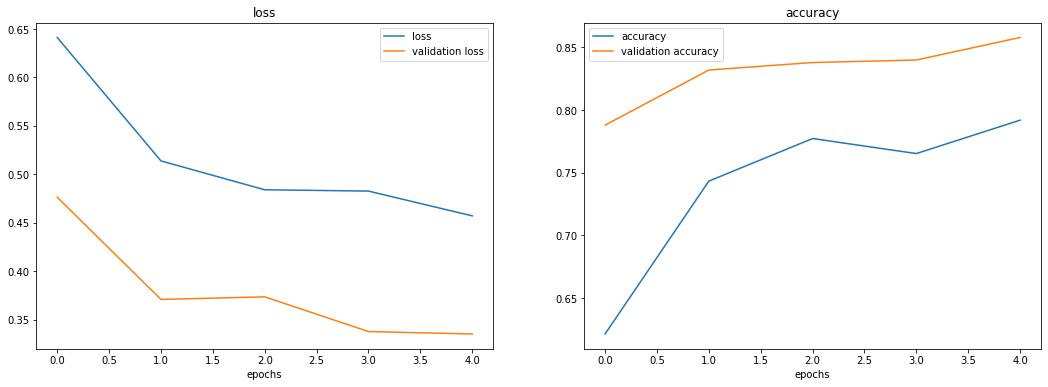

In [41]:
# plot the model 3 performance
eval_plot(history_3)

Lets try anothetr model with more number of epochs

In [42]:
tf.random.set_seed(42)

model_4 = Sequential([
    Conv2D(filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'valid', activation = 'relu', input_shape = (224,224,3)),
    MaxPool2D(pool_size = (2,2)),
    Conv2D(10,3,activation = 'relu'),
    MaxPool2D(),
    Conv2D(10,3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(units = 1, activation = 'sigmoid')
], name = 'M4')

In [43]:
model_4.compile(loss = 'binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

history_4 = model_4.fit(train_data_augmented,
                        epochs = 10,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/10
47/47 [==============================] - 24s 472ms/step - loss: 0.6714 - accuracy: 0.5900 - val_loss: 0.5521 - val_accuracy: 0.7220
Epoch 2/10
47/47 [==============================] - 22s 474ms/step - loss: 0.5507 - accuracy: 0.7273 - val_loss: 0.4228 - val_accuracy: 0.7900
Epoch 3/10
47/47 [==============================] - 22s 469ms/step - loss: 0.4998 - accuracy: 0.7620 - val_loss: 0.3800 - val_accuracy: 0.8560
Epoch 4/10
47/47 [==============================] - 22s 468ms/step - loss: 0.4871 - accuracy: 0.7693 - val_loss: 0.3712 - val_accuracy: 0.8380
Epoch 5/10
47/47 [==============================] - 22s 468ms/step - loss: 0.4691 - accuracy: 0.7840 - val_loss: 0.3619 - val_accuracy: 0.8380
Epoch 6/10
47/47 [==============================] - 22s 470ms/step - loss: 0.4651 - accuracy: 0.7860 - val_loss: 0.3910 - val_accuracy: 0.8240
Epoch 7/10
47/47 [==============================] - 22s 470ms/step - loss: 0.4532 - accuracy: 0.7980 - val_loss: 0.4809 - val_accuracy: 0.7480

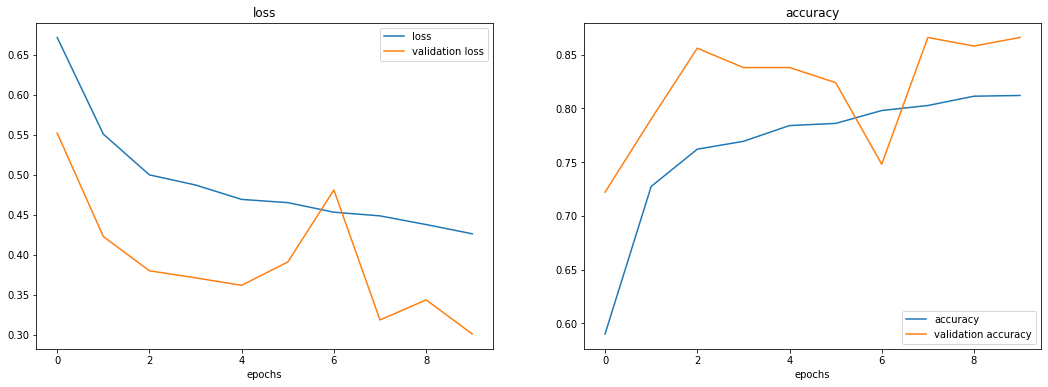

In [44]:
# plot the model 4 performance
eval_plot(history_4)

In [45]:
print(model_1.evaluate(test_data))
print(model_2.evaluate(test_data))
print(model_3.evaluate(test_data))
print(model_4.evaluate(test_data))

16/16 [==============================] - 2s 133ms/step - loss: 0.4810 - accuracy: 0.8100
[0.48096731305122375, 0.8100000023841858]
16/16 [==============================] - 2s 132ms/step - loss: 0.3464 - accuracy: 0.8600
[0.34640824794769287, 0.8600000143051147]
16/16 [==============================] - 2s 133ms/step - loss: 0.3352 - accuracy: 0.8580
[0.33518949151039124, 0.8579999804496765]
16/16 [==============================] - 3s 165ms/step - loss: 0.3011 - accuracy: 0.8660
[0.3010885417461395, 0.8659999966621399]


Fine tuning the augmentation

In [46]:
tf.random.set_seed(42)

train_gen_augmented2 = ImageDataGenerator(rotation_range= 0.2,
                                         shear_range =0.2,
                                         zoom_range = 0.2,
                                         horizontal_flip = True,
                                         rescale = 1/255.0,
                                         )

In [47]:
train_data_augmented2 = train_gen_augmented.flow_from_directory(directory = train_dir,
                                                               target_size = (224,224),
                                                               class_mode = 'binary',
                                                               batch_size = 32,
                                                               )

Found 1500 images belonging to 2 classes.


In [48]:
tf.random.set_seed(42)

model_5 = Sequential([
    Conv2D(filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'valid', activation = 'relu', input_shape = (224,224,3)),
    MaxPool2D(pool_size = (2,2)),
    Conv2D(10,3,activation = 'relu'),
    MaxPool2D(),
    Conv2D(10,3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(units = 1, activation = 'sigmoid')
], name = 'M5')

In [49]:
model_5.compile(loss = 'binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

history_5 = model_5.fit(train_data_augmented2,
                        epochs = 10,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/10
47/47 [==============================] - 23s 468ms/step - loss: 0.6799 - accuracy: 0.5853 - val_loss: 0.5709 - val_accuracy: 0.7620
Epoch 2/10
47/47 [==============================] - 22s 474ms/step - loss: 0.5531 - accuracy: 0.7320 - val_loss: 0.4038 - val_accuracy: 0.8280
Epoch 3/10
47/47 [==============================] - 22s 468ms/step - loss: 0.5098 - accuracy: 0.7573 - val_loss: 0.4021 - val_accuracy: 0.8280
Epoch 4/10
47/47 [==============================] - 22s 469ms/step - loss: 0.4868 - accuracy: 0.7640 - val_loss: 0.3907 - val_accuracy: 0.8480
Epoch 5/10
47/47 [==============================] - 22s 473ms/step - loss: 0.4641 - accuracy: 0.7733 - val_loss: 0.3566 - val_accuracy: 0.8420
Epoch 6/10
47/47 [==============================] - 22s 477ms/step - loss: 0.5083 - accuracy: 0.7533 - val_loss: 0.3977 - val_accuracy: 0.8400
Epoch 7/10
47/47 [==============================] - 22s 479ms/step - loss: 0.4709 - accuracy: 0.7927 - val_loss: 0.3560 - val_accuracy: 0.8620

In [50]:
print(model_1.evaluate(test_data))
print(model_2.evaluate(test_data))
print(model_3.evaluate(test_data))
print(model_4.evaluate(test_data))
print(model_5.evaluate(test_data))

16/16 [==============================] - 2s 133ms/step - loss: 0.4810 - accuracy: 0.8100
[0.480967253446579, 0.8100000023841858]
16/16 [==============================] - 2s 129ms/step - loss: 0.3464 - accuracy: 0.8600
[0.34640827775001526, 0.8600000143051147]
16/16 [==============================] - 3s 166ms/step - loss: 0.3352 - accuracy: 0.8580
[0.3351895213127136, 0.8579999804496765]
16/16 [==============================] - 2s 133ms/step - loss: 0.3011 - accuracy: 0.8660
[0.30108848214149475, 0.8659999966621399]
16/16 [==============================] - 2s 131ms/step - loss: 0.4730 - accuracy: 0.7780
[0.4730418622493744, 0.777999997138977]


Lets do some prediction on the external data

--2023-02-11 07:32:48--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2023-02-11 07:32:48 (202 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



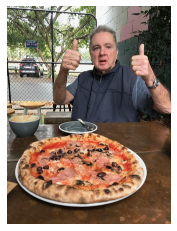

In [51]:
# get an external image

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

img = mpimg.imread('03-pizza-dad.jpeg')
plt.imshow(img)
plt.axis(False);

In [52]:
type(img)

numpy.ndarray

In [53]:
img.shape

(4032, 3024, 3)

custom images can have mutiple shapes, we want create a function for correcting the input shape and feed to the model for prediction

In [54]:
def preprocess_custom_image(file_name):

  image_file = tf.io.read_file(file_name) #reading the file
  image_val = tf.image.decode_image(image_file) # decoding the file as an image
  image_val = tf.image.resize(image_val, size=(224,224)) # resizing the image into standard shape
  image_val = image_val/tf.reduce_max(image_val).numpy() # normalizing the tensor

  return image_val

In [55]:
image_preprocesed = preprocess_custom_image('03-pizza-dad.jpeg')
image_preprocesed.shape

TensorShape([224, 224, 3])

In [56]:
tf.expand_dims(image_preprocesed, axis = 0).shape

TensorShape([1, 224, 224, 3])

In [57]:
model_4.predict(tf.expand_dims(image_preprocesed, axis = 0))

1/1 [==============================] - 0s 177ms/step


array([[0.37436235]], dtype=float32)

create a custom function to show the image and do the prediction with the class name

In [58]:
def predict_func(model, file_name):

  img = preprocess_custom_image(file_name)  # preprocessing the image using above defined function

  pred = model.predict(tf.expand_dims(img, axis = 0)) # predict using the model

  class_names = ['pizaa','steak']

  class_ind = int(pred.round()) # converting the pred prob to a class index

  pred_class = class_names[class_ind] # arriving the class index

  print('\n',pred_class,'\n')

  im_read = mpimg.imread(file_name) # reading the image file

  plt.imshow(im_read) # showing the image file

  plt.axis(False)

1/1 [==============================] - 0s 19ms/step

 pizaa 



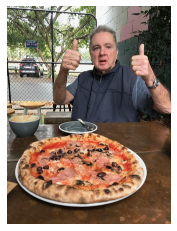

In [59]:
predict_func(model_4,'03-pizza-dad.jpeg')

--2023-02-11 07:32:52--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.009s  

2023-02-11 07:32:52 (208 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]

1/1 [==============================] - 0s 30ms/step

 steak 



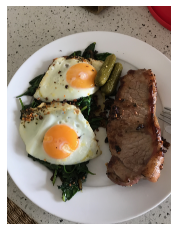

In [60]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

predict_func(model_4,'03-steak.jpeg')

Looks like the model peforms well in the above unseen context